In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
with open("/content/drive/My Drive/Junior Fall/COS IW/LiftingGymCritique/json/alphapose-results.json", "r", encoding="UTF-8") as json_file:
  json_str_good = json_file.read()

In [ ]:
with open("/content/drive/My Drive/Junior Fall/COS IW/LiftingGymCritique/json_bad/alphapose-results.json", "r", encoding="UTF-8") as json_file:
  json_str_bad = json_file.read()

In [ ]:
from json import loads
keypoints_good = loads(json_str_good)
keypoints_bad = loads(json_str_bad)

Building the Dataset

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
column_names = ["nose_x", "nose_y", "nose_c", "left_eye_x", "left_eye_y", "left_eye_c", "right_eye_x", "right_eye_y", "right_eye_c",
                "left_ear_x", "left_ear_y", "left_ear_c", "right_ear_x", "right_ear_y", "right_ear_c",
                "left_shoulder_x", "left_shoulder_y", "left_shoulder_c", "right_shoulder_x", "right_shoulder_y", "right_shoulder_c",
                "left_elbow_x", "left_elbow_y", "left_elbow_c", "right_elbow_x", "right_elbow_y", "right_elbow_c",
                "left_wrist_x", "left_wrist_y", "left_wrist_c", "right_wrist_x", "right_wrist_y", "right_wrist_c",
                "left_hip_x", "left_hip_y", "left_hip_c", "right_hip_x", "right_hip_y", "right_hip_c",
                "left_knee_x", "left_knee_y", "left_knee_c", "right_knee_x", "right_knee_y", "right_knee_c",
                "left_ankle_x", "left_ankle_y", "left_ankle_c", "right_ankle_x", "right_ankle_y", "right_ankle_c", "form"
]

In [ ]:
len(column_names)

52

In [ ]:
keypoints_df = pd.DataFrame(columns=column_names)
for index, item in enumerate(keypoints_good):
  temp_list = item["keypoints"].copy()
  temp_list.append("1")
  keypoints_df.loc[len(keypoints_df.index)] = temp_list

for index, item in enumerate(keypoints_bad):
  temp_list = item["keypoints"].copy()
  temp_list.append("0")
  keypoints_df.loc[len(keypoints_df.index)] = temp_list

keypoints_df

,nose_x,nose_y,nose_c,left_eye_x,left_eye_y,left_eye_c,right_eye_x,right_eye_y,right_eye_c,left_ear_x,left_ear_y,left_ear_c,right_ear_x,right_ear_y,right_ear_c,left_shoulder_x,left_shoulder_y,left_shoulder_c,right_shoulder_x,right_shoulder_y,right_shoulder_c,left_elbow_x,left_elbow_y,left_elbow_c,right_elbow_x,right_elbow_y,right_elbow_c,left_wrist_x,left_wrist_y,left_wrist_c,right_wrist_x,right_wrist_y,right_wrist_c,left_hip_x,left_hip_y,left_hip_c,right_hip_x,right_hip_y,right_hip_c,left_knee_x,left_knee_y,left_knee_c,right_knee_x,right_knee_y,right_knee_c,left_ankle_x,left_ankle_y,left_ankle_c,right_ankle_x,right_ankle_y,right_ankle_c,form
0,861.947327,1649.633789,0.893071,916.329285,1631.506592,0.941867,861.947327,1595.251953,0.873558,1061.347900,1685.888428,0.960865,843.820007,1613.379150,0.480175,1260.748291,1885.289062,0.751817,934.456604,1776.525146,0.741455,1641.422119,2012.180176,0.767633,843.820007,1685.888428,0.611284,1532.658203,1903.416260,0.788920,807.565369,1613.379150,0.701201,1423.894287,2284.090088,0.755315,1188.239014,2229.708008,0.761265,1188.239014,2592.254395,0.858022,861.947327,2392.854004,0.899989,1369.512207,2954.800781,0.849195,1079.475098,2737.272949,0.930117,1
1,847.923523,1632.974731,0.877514,921.093140,1596.389893,0.942164,847.923523,1578.097534,0.896811,1067.432373,1651.267090,0.966399,847.923523,1578.097534,0.438402,1268.648804,1870.776001,0.742415,939.385559,1761.021484,0.729692,1634.496948,1998.822754,0.713993,829.631165,1669.559570,0.501581,1561.327271,1889.068359,0.713110,793.046326,1596.389893,0.672090,1433.280518,2273.208740,0.751531,1195.479248,2218.331543,0.749757,1195.479248,2602.472168,0.834088,866.215942,2401.255615,0.884210,1378.403320,2968.320312,0.839828,1085.724854,2730.519043,0.921577,1
2,855.045349,1604.279541,0.887226,909.018066,1568.297729,0.937066,855.045349,1568.297729,0.935201,1070.936157,1622.270386,0.954261,837.054443,1550.306763,0.552530,1250.845093,1838.161255,0.783459,944.999817,1748.206787,0.702131,1628.654053,1964.097534,0.715007,837.054443,1640.261353,0.456455,1556.690430,1892.133911,0.557142,801.072632,1586.288574,0.736202,1430.754150,2269.942871,0.779229,1196.872437,2215.970215,0.755218,1196.872437,2611.770020,0.824671,855.045349,2395.879150,0.898314,1376.781494,2953.597168,0.822202,1088.927002,2737.706299,0.916123,1
3,864.901917,1589.395142,0.910158,919.522583,1552.981323,0.917888,846.695068,1552.981323,0.932985,1065.177612,1607.601929,0.949855,846.695068,1552.981323,0.541388,1247.246460,1807.877686,0.839816,937.729492,1753.257080,0.762907,1574.970459,1935.325928,0.717534,828.488159,1625.808838,0.408074,1793.453003,1935.325928,0.323023,792.074402,1589.395142,0.628519,1429.315308,2244.843018,0.792428,1192.625854,2190.222168,0.780085,1192.625854,2608.980469,0.836506,846.695068,2390.498047,0.945954,1374.694702,2954.911377,0.842649,1083.384521,2736.428711,0.896197,1
4,858.630981,1582.620239,0.893793,914.894653,1545.111084,0.907645,858.630981,1526.356567,0.938354,1064.931274,1601.374878,0.955007,839.876343,1526.356567,0.554764,1252.477051,1807.675171,0.772118,952.403809,1713.902344,0.760022,1608.814087,1957.711792,0.777960,858.630981,1638.884033,0.534648,1533.795776,1826.429810,0.759032,821.121826,1563.865723,0.664203,1421.268311,2220.275879,0.786520,1177.458740,2182.766846,0.798510,1196.213379,2595.367432,0.866355,858.630981,2389.067139,0.937431,1365.004517,2951.704346,0.850100,1083.685913,2726.649414,0.888231,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8690,1344.275635,988.950989,0.222847,1386.922363,1062.613403,0.205405,1328.767822,1004.458862,0.153714,1301.629028,1085.875244,0.366004,1394.676270,1101.383179,0.429615,1231.843506,1264.215942,0.323059,1425.692017,1287.477783,0.226488,1448.953857,1085.875244,0.084632,1487.723633,1450.310547,0.068718,1224.089600,1783.729980,0.058103,1224.089600,1752.7

In [ ]:
keypoints_x = keypoints_df.drop(labels='form', axis=1)
keypoints_x

,nose_x,nose_y,nose_c,left_eye_x,left_eye_y,left_eye_c,right_eye_x,right_eye_y,right_eye_c,left_ear_x,left_ear_y,left_ear_c,right_ear_x,right_ear_y,right_ear_c,left_shoulder_x,left_shoulder_y,left_shoulder_c,right_shoulder_x,right_shoulder_y,right_shoulder_c,left_elbow_x,left_elbow_y,left_elbow_c,right_elbow_x,right_elbow_y,right_elbow_c,left_wrist_x,left_wrist_y,left_wrist_c,right_wrist_x,right_wrist_y,right_wrist_c,left_hip_x,left_hip_y,left_hip_c,right_hip_x,right_hip_y,right_hip_c,left_knee_x,left_knee_y,left_knee_c,right_knee_x,right_knee_y,right_knee_c,left_ankle_x,left_ankle_y,left_ankle_c,right_ankle_x,right_ankle_y,right_ankle_c
0,861.947327,1649.633789,0.893071,916.329285,1631.506592,0.941867,861.947327,1595.251953,0.873558,1061.347900,1685.888428,0.960865,843.820007,1613.379150,0.480175,1260.748291,1885.289062,0.751817,934.456604,1776.525146,0.741455,1641.422119,2012.180176,0.767633,843.820007,1685.888428,0.611284,1532.658203,1903.416260,0.788920,807.565369,1613.379150,0.701201,1423.894287,2284.090088,0.755315,1188.239014,2229.708008,0.761265,1188.239014,2592.254395,0.858022,861.947327,2392.854004,0.899989,1369.512207,2954.800781,0.849195,1079.475098,2737.272949,0.930117
1,847.923523,1632.974731,0.877514,921.093140,1596.389893,0.942164,847.923523,1578.097534,0.896811,1067.432373,1651.267090,0.966399,847.923523,1578.097534,0.438402,1268.648804,1870.776001,0.742415,939.385559,1761.021484,0.729692,1634.496948,1998.822754,0.713993,829.631165,1669.559570,0.501581,1561.327271,1889.068359,0.713110,793.046326,1596.389893,0.672090,1433.280518,2273.208740,0.751531,1195.479248,2218.331543,0.749757,1195.479248,2602.472168,0.834088,866.215942,2401.255615,0.884210,1378.403320,2968.320312,0.839828,1085.724854,2730.519043,0.921577
2,855.045349,1604.279541,0.887226,909.018066,1568.297729,0.937066,855.045349,1568.297729,0.935201,1070.936157,1622.270386,0.954261,837.054443,1550.306763,0.552530,1250.845093,1838.161255,0.783459,944.999817,1748.206787,0.702131,1628.654053,1964.097534,0.715007,837.054443,1640.261353,0.456455,1556.690430,1892.133911,0.557142,801.072632,1586.288574,0.736202,1430.754150,2269.942871,0.779229,1196.872437,2215.970215,0.755218,1196.872437,2611.770020,0.824671,855.045349,2395.879150,0.898314,1376.781494,2953.597168,0.822202,1088.927002,2737.706299,0.916123
3,864.901917,1589.395142,0.910158,919.522583,1552.981323,0.917888,846.695068,1552.981323,0.932985,1065.177612,1607.601929,0.949855,846.695068,1552.981323,0.541388,1247.246460,1807.877686,0.839816,937.729492,1753.257080,0.762907,1574.970459,1935.325928,0.717534,828.488159,1625.808838,0.408074,1793.453003,1935.325928,0.323023,792.074402,1589.395142,0.628519,1429.315308,2244.843018,0.792428,1192.625854,2190.222168,0.780085,1192.625854,2608.980469,0.836506,846.695068,2390.498047,0.945954,1374.694702,2954.911377,0.842649,1083.384521,2736.428711,0.896197
4,858.630981,1582.620239,0.893793,914.894653,1545.111084,0.907645,858.630981,1526.356567,0.938354,1064.931274,1601.374878,0.955007,839.876343,1526.356567,0.554764,1252.477051,1807.675171,0.772118,952.403809,1713.902344,0.760022,1608.814087,1957.711792,0.777960,858.630981,1638.884033,0.534648,1533.795776,1826.429810,0.759032,821.121826,1563.865723,0.664203,1421.268311,2220.275879,0.786520,1177.458740,2182.766846,0.798510,1196.213379,2595.367432,0.866355,858.630981,2389.067139,0.937431,1365.004517,2951.704346,0.850100,1083.685913,2726.649414,0.888231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8690,1344.275635,988.950989,0.222847,1386.922363,1062.613403,0.205405,1328.767822,1004.458862,0.153714,1301.629028,1085.875244,0.366004,1394.676270,1101.383179,0.429615,1231.843506,1264.215942,0.323059,1425.692017,1287.477783,0.226488,1448.953857,1085.875244,0.084632,1487.723633,1450.310547,0.068718,1224.089600,1783.729980,0.058103,1224.089600,1752.714233,0.092770,1286

In [ ]:
keypoints_y = keypoints_df.form.copy()
keypoints_y

0       1
1       1
2       1
3       1
4       1
       ..
8690    0
8691    0
8692    0
8693    0
8694    0
Name: form, Length: 8695, dtype: object

In [ ]:
# splitting into test and train
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(keypoints_x, keypoints_y, test_size=0.2, random_state=42)


Feature Selection

In [ ]:
# feature selection using lasso
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoLarsCV, LinearRegression
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# use CV to find best alpha parameter
reg = LassoLarsCV(cv=5).fit(x_train, y_train)
print(reg.score(x_train, y_train))
alpha = reg.alpha_
print(alpha)
# create x_train with best features for form prediction
lasso = Lasso(alpha=0.7).fit(x_train, y_train)
selected = np.asarray(np.nonzero(lasso.coef_))[0]
xTrain_new = x_train.iloc[:, selected]
# create x_test, includes all families but with new features
xTest_new = x_test.iloc[:,selected]


0.8985476663936298
2.4276378241474738e-06


In [ ]:
selected

array([ 1,  7, 10, 12, 15, 18, 24, 25, 27, 28, 30, 34, 39, 40, 42, 43, 45,
       46, 48])

In [ ]:
xTrain_new

,nose_y,right_eye_y,left_ear_y,right_ear_x,left_shoulder_x,right_shoulder_x,right_elbow_x,right_elbow_y,left_wrist_x,left_wrist_y,right_wrist_x,left_hip_y,left_knee_x,left_knee_y,right_knee_x,right_knee_y,left_ankle_x,left_ankle_y,right_ankle_x
7624,2271.994385,2238.575195,2121.607422,862.252319,1163.026367,878.961975,995.929688,1687.155884,1463.800537,2071.478516,745.284607,2021.349365,1413.671509,2489.220215,1046.058716,2338.833252,1430.381226,3124.187744,1029.348999
8542,1579.052368,1517.912598,1477.152832,766.461304,1092.540161,786.841248,929.500732,1925.511230,1296.339478,1782.851685,1194.439819,2190.450195,949.880676,2577.668945,766.461304,2496.149170,1255.579590,3026.027344,929.500732
4456,1646.115479,1586.264160,1606.214600,900.698547,1180.004761,840.847168,1140.103882,1845.619995,1379.509277,1865.570435,1239.856201,2324.430664,1080.252563,2643.637939,761.045349,2464.083984,1299.707520,3082.547852,960.549866
5283,1956.011475,1920.835938,1815.309082,730.771729,1223.230347,906.649841,1152.879150,1551.491943,1487.047485,1885.660278,977.001038,1991.187134,1399.108398,2413.294434,1188.054688,2325.355469,1381.520630,2958.516357,1117.703491
8180,1802.150391,1746.904541,1728.489258,798.442810,1093.087280,816.858093,1093.087280,1912.642090,1295.655273,2004.718506,1203.578979,2336.193604,927.349731,2612.422607,780.027527,2520.346191,1240.409546,3017.558838,964.180298
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,2153.481201,2123.782227,2004.986206,667.786438,1009.325012,727.184448,593.538940,1871.340698,1306.315063,2094.083252,474.742889,2391.073242,949.927002,2643.514893,682.635925,2584.116699,1321.164551,2999.902832,905.378479
5191,1517.950073,1460.207397,1498.702515,795.464783,1218.911011,872.454956,833.959900,1652.682983,1469.129272,1787.415894,795.464783,2268.604736,1026.435425,2653.555908,853.207458,2538.070557,1334.396362,3057.754639,987.940308
5390,1848.067505,1791.198975,1772.242798,954.139587,1238.481812,954.139587,1162.657227,1885.979736,1522.824097,1904.935913,1390.131104,2132.409668,1314.306396,2511.532715,1029.964111,2359.883545,1352.218750,3061.261230,1067.876465
860,1134.867432,1089.869507,1134.867432,787.482239,1169.964355,877.478027,1012.471680,1719.840088,1372.454834,1427.353760,967.473816,2012.326416,1102.467529,2462.305420,854.979065,2304.812744,1259.960083,2957.282227,1012.471680


In [ ]:
for col in xTrain_new.columns:
  print(col)

nose_y
right_eye_y
left_ear_y
right_ear_x
left_shoulder_x
right_shoulder_x
right_elbow_x
right_elbow_y
left_wrist_x
left_wrist_y
right_wrist_x
left_hip_y
left_knee_x
left_knee_y
right_knee_x
right_knee_y
left_ankle_x
left_ankle_y
right_ankle_x


In [ ]:
for i in range(len(column_names)):
  if i in selected:
    print(column_names[i])

nose_y
right_eye_y
left_ear_y
right_ear_x
left_shoulder_x
right_shoulder_x
right_elbow_x
right_elbow_y
left_wrist_x
left_wrist_y
right_wrist_x
left_hip_y
left_knee_x
left_knee_y
right_knee_x
right_knee_y
left_ankle_x
left_ankle_y
right_ankle_x


In [ ]:
column_names

['nose_x',
 'nose_y',
 'nose_c',
 'left_eye_x',
 'left_eye_y',
 'left_eye_c',
 'right_eye_x',
 'right_eye_y',
 'right_eye_c',
 'left_ear_x',
 'left_ear_y',
 'left_ear_c',
 'right_ear_x',
 'right_ear_y',
 'right_ear_c',
 'left_shoulder_x',
 'left_shoulder_y',
 'left_shoulder_c',
 'right_shoulder_x',
 'right_shoulder_y',
 'right_shoulder_c',
 'left_elbow_x',
 'left_elbow_y',
 'left_elbow_c',
 'right_elbow_x',
 'right_elbow_y',
 'right_elbow_c',
 'left_wrist_x',
 'left_wrist_y',
 'left_wrist_c',
 'right_wrist_x',
 'right_wrist_y',
 'right_wrist_c',
 'left_hip_x',
 'left_hip_y',
 'left_hip_c',
 'right_hip_x',
 'right_hip_y',
 'right_hip_c',
 'left_knee_x',
 'left_knee_y',
 'left_knee_c',
 'right_knee_x',
 'right_knee_y',
 'right_knee_c',
 'left_ankle_x',
 'left_ankle_y',
 'left_ankle_c',
 'right_ankle_x',
 'right_ankle_y',
 'right_ankle_c',
 'form']

Naive Bayes Classifier

Logistic Regression

In [ ]:
y_train

7624    0
8542    0
4456    1
5283    0
8180    0
       ..
5734    0
5191    0
5390    0
860     1
7270    0
Name: form, Length: 6956, dtype: object

Accuracy Score Function

In [ ]:
def accuracy_score(results):
  y_test_arr = y_test.iloc[0:].values
  score = 0
  for i in range(len(results)):
    if results[i] == y_test_arr[i]:
      score += 1
  return score/1739

Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(max_iter = 5000)
LR.fit(x_train, y_train)
predictions_LR = LR.predict(x_test)

In [ ]:
accuracy_score(predictions_LR)

0.9959746981023577

Ridge Classification

In [ ]:
from sklearn.linear_model import RidgeClassifierCV
from sklearn.linear_model import RidgeClassifier

ridgeCV_alpha_ = 1
ridge = RidgeClassifier(alpha=ridgeCV_alpha_).fit(x_train, y_train)
predictions_ridge = ridge.predict(x_test)
print("With an alpha of " + str(ridgeCV_alpha_) + ", the accuracy score of the ridge classifier is " + str(accuracy_score(predictions_ridge)))

With an alpha of 1, the accuracy score of the ridge classifier is 0.9902242668200115


Multi-Layer Perceptron Classifier (NN)

In [ ]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5,100), random_state=1)
clf.fit(x_train, y_train)
predictions_nn = clf.predict(x_test)
print("The accuracy score of the Neural Network is " + str(accuracy_score(predictions_nn)))

The accuracy score of the Neural Network is 0.9879240943070731


Confusion Matrices

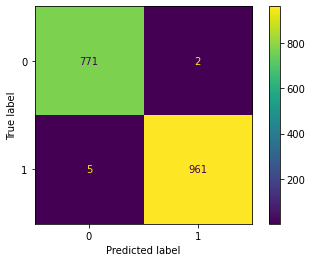

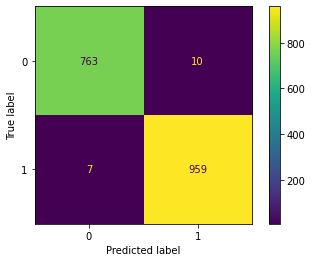

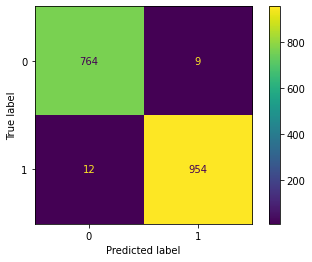

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import multilabel_confusion_matrix, confusion_matrix, plot_confusion_matrix
plot_confusion_matrix(LR, x_test, y_test)
plot_confusion_matrix(ridge, x_test, y_test)
plot_confusion_matrix(clf, x_test, y_test)
plt.show()

NN with new features

In [ ]:
from sklearn.neural_network import MLPClassifier
clf2 = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5,100), random_state=1)
clf2.fit(xTrain_new, y_train)
results2 = clf2.predict(xTest_new)
accuracy_score(results2)

0.6635997699827487